# KIỂM TRA THỰC HÀNH CUỐI KỲ
# MÔN LẬP TRÌNH PHÂN TÍCH 1

21087481_Dương Hoàng Lan Anh

Import thư viện

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

## Load dữ liệu

In [2]:
df = pd.read_csv('../data/student_mat.csv')

Hiển thị toàn bộ dữ liệu

In [3]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## EDA

### Hãy vẽ biều đồ cột và phân tích xem trình độ học vấn của cha (cột Fedu) ảnh hướng thế nào đến điểm G1, G2, G3   (3đ)

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_4960\4136049623.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 1000x600 with 0 Axes>

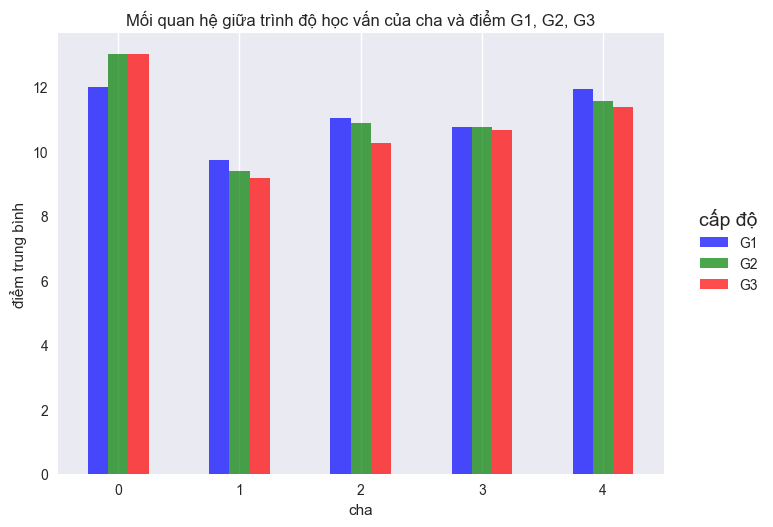

In [17]:
# Chọn style vẽ biểu đồ
plt.style.use('seaborn')

filtered_data = df[df['Fedu'].notna()]

grouped_data = filtered_data.groupby('Fedu')[['G1', 'G2', 'G3']].mean()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', alpha=0.7, color=['b', 'g', 'r'])
plt.title('Mối quan hệ giữa trình độ học vấn của cha và điểm G1, G2, G3')
plt.xlabel('cha')
plt.ylabel('điểm trung bình')
plt.xticks(rotation=0)
plt.legend(title='cấp độ', loc=(1.05, 0.4))
plt.grid(axis='y')
plt.tight_layout()

**Nhận xét:**

- Biểu đồ trên cho thấy có sự tương quan giữa trình độ học vấn của cha và điểm G1, G2, G3. Cụ thể là trình độ học vấn của cha càng cao thì điểm G1, G2, G3 càng cao.

- Điểm G1, G2, G3 có xu hướng tăng dần khi trình độ học vấn của cha càng cao. Điều này thể hiện rằng học sinh có xu hướng có điểm cao hơn khi cha của họ có trình độ học vấn cao.

- Các cột có độ biến động khác nhau, nhưng có vẻ rằng G3 có độ biến động lớn hơn so với G1 và G2. Điều này có thể cho thấy kết quả cuối kỳ (G3) phụ thuộc nhiều vào học lực trước đó (G2).

- Biểu đồ sử dụng màu sắc khác nhau (blue, green, red) để phân biệt giữa các kỳ thi G1, G2, G3. 

### Vẽ biểu đồ đường để phân tích mối quan hệ giữa 3 biến G3, Absences và School và cho nhận xét. (3đ)

C:\Users\Lan Anh\AppData\Local\Temp\ipykernel_4960\881393009.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


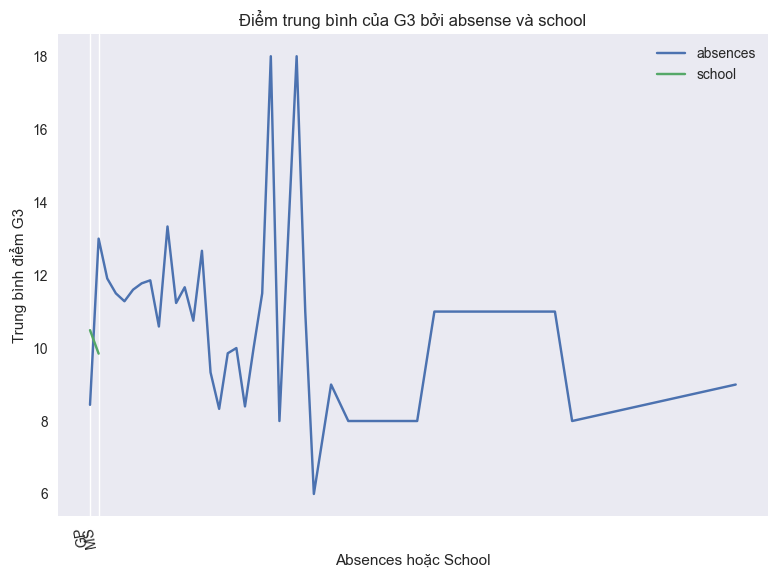

In [23]:
# Chọn style vẽ biểu đồ
plt.style.use('seaborn')

# Vẽ biểu đồ đường
filtered_data = df[df[['G3', 'absences', 'school']].notna().all(axis=1)]
grouped_by_school = filtered_data.groupby('school')['G3'].mean()
grouped_by_absences = filtered_data.groupby('absences')['G3'].mean() 

plt.figure(figsize=(8, 6))
plt.plot(grouped_by_absences.index, grouped_by_absences.values, label='absences')
plt.plot(grouped_by_school.index, grouped_by_school.values, label='school')
plt.title('Điểm trung bình của G3 bởi absense và school')
plt.xlabel('Absences hoặc School')
plt.ylabel('Trung bình điểm G3')
plt.grid(axis='y')
plt.legend()

# Điều chỉnh khoảng cách giữa các giá trị trên trục x
plt.xticks(rotation=100, ha='right')

plt.tight_layout()

**Nhận xét biểu đồ:**

- Biểu đồ trên biểu diễn mối tương quan giữa điểm trung bình của G3 dựa trên 2 biến: absences và school. Mỗi đường đại diện cho một biến, trong biểu đồ đường này đã sử dụng các giá trị trung bình để thể hiện sự biến thiên của G3 dựa trên các giá trị của absences và school.

- Đường màu xanh lá cây đại diện cho trường GP, đường màu xanh dương đại diện cho trường MS. Có thể thấy rằng, điểm trung bình của G3 ở trường GP cao hơn so với trường MS. Điều này có thể cho thấy học sinh của trường GP có xu hướng có điểm cao hơn so với học sinh của trường MS.

- Điểm trung bình của G3 có xu hướng giảm khi số lần vắng học tăng. Điều này có thể cho thấy học sinh có xu hướng có điểm thấp hơn khi vắng học nhiều.

## Linear Regression

Hãy sử dụng hồi quy tuyến tính để tìm mô hình dự đoán điểm G3 khi biết trước điểm G2 và đánh giá mô hình tìm được.

In [24]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Chọn dữ liệu
# X: biến độc lập
# Y: biến phụ thuộc
X = df[['G2']]  # biến độc lập
Y = df['G3']    # biến phụ thuộc

# Huấn luyện mô hình
model.fit(X, Y)

# In kết quả

# In ra giá trị của hệ số chặn (intercept), còn được gọi là giá trị của biến phụ thuộc khi biến độc lập bằng 0.
print('Intercept:', model.intercept_)

# In ra giá trị của hệ số của biến độc lập (G2), tức là độ dốc của đường hồi quy.
print('Coefficient:', model.coef_[0])

# In ra giá trị R-squared, là một thước đo của độ chính xác của mô hình.
print('R-squared:', model.score(X, Y))

# print(model.intercept_, model.coef_, model.score(X, Y))

Intercept: -1.3927582066452366
Coefficient: 1.1021123562440616
R-squared: 0.818786078004268


**Nhận xét:**

- Ta có phương trình cho mô hình hồi quy tuyến tính 1 biến là:

    Y = Intercept + Coefficient * X

    Y = -1.39 + 1.1 * X

Từ đó suy ra: R^2 = 81.88

- Mối tương quan giữa biến X (trong trường hợp này là G2) và biến Y (trong trường hợp này là G3) có thể được đánh giá dựa trên R-squared. Nếu R-squared càng lớn, đồng nghĩa với việc có mối tương quan mạnh giữa G2 và G3. Trong trường hợp này, R-squared = 81.88%, cho thấy mối tương quan mạnh giữa G2 và G3.

**Vẽ biểu đồ cho mô hình hồi quy tuyến tính trên:**

Intercept: -1.3927582066452366
Coefficient: 1.1021123562440616
R-squared: 0.818786078004268


e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

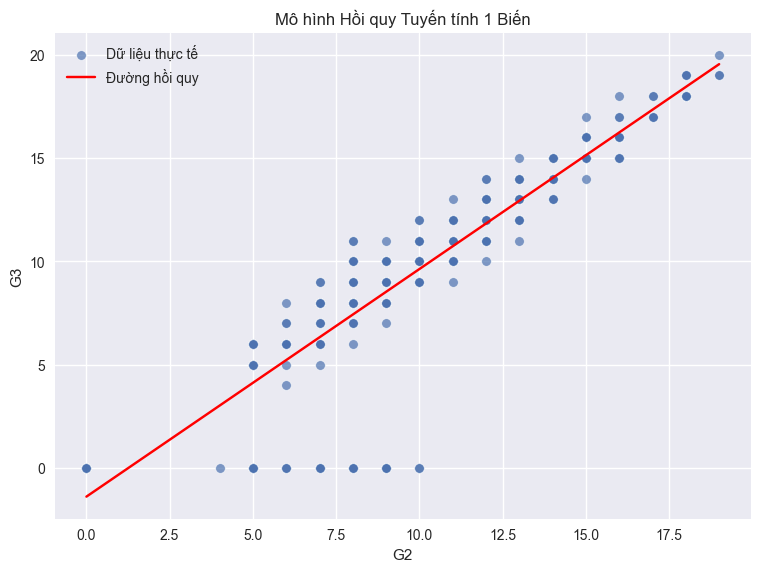

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Chọn dữ liệu
X = df[['G2']]  # biến độc lập
Y = df['G3']    # biến phụ thuộc

# Huấn luyện mô hình
model.fit(X, Y)

# In kết quả
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_[0])
print('R-squared:', model.score(X, Y))

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.scatterplot(x='G2', y='G3', data=df, alpha=0.7, label='Dữ liệu thực tế')
sns.lineplot(x=X['G2'], y=model.predict(X), color='red', label='Đường hồi quy')
plt.title('Mô hình Hồi quy Tuyến tính 1 Biến')
plt.xlabel('G2')
plt.ylabel('G3')
plt.legend()
plt.show()


**Nhận xét biểu đồ:**

- Các điểm màu xanh đại diện cho các điểm dữ liệu thực tế, với trục x là giá trị của G2 và trục y là giá trị của G3

- Đường màu đỏ là đường hồi quy tuyến tính, là dự đoán của mô hình về mối quan hệ giữa G2 và G3. Đường hồi quy được tạo bởi việc sử dụng các hệ số từ mô hình hồi quy tuyến tính.

- Giá trị R-squared để đánh giá độ chính xác của mô hình. R-squared = 81.88% cho thấy mô hình có độ chính xác cao, có thể giải thích được sự biến động của G3 dựa trên G2.